In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
filename = 'fold5/100032-3-0-0.wav'

In [ ]:
# 100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark

In [7]:
import IPython.display as ipd
import librosa
import librosa.display

In [18]:
import sounddevice as sd

In [2]:
!dir

 Volume in drive D is Windows
 Volume Serial Number is 1E2D-7DE0

 Directory of d:\a27_YEARS_OLD\audio_classification

17-10-2024  00:56    <DIR>          .
17-10-2024  00:06    <DIR>          ..
17-10-2024  00:51    <DIR>          fold1
17-10-2024  00:52    <DIR>          fold10
17-10-2024  00:52    <DIR>          fold2
17-10-2024  00:53    <DIR>          fold3
17-10-2024  00:54    <DIR>          fold4
17-10-2024  00:55    <DIR>          fold5
17-10-2024  00:55    <DIR>          fold6
17-10-2024  00:56    <DIR>          fold7
17-10-2024  00:56    <DIR>          fold8
17-10-2024  00:57    <DIR>          fold9
17-10-2024  00:25                 0 README.md
17-10-2024  09:42                46 requirements.txt
17-10-2024  09:49             1,282 sound_eda.ipynb
17-10-2024  00:50           494,104 UrbanSound8K.csv
17-10-2024  00:30    <DIR>          venv
               4 File(s)        495,432 bytes
              13 Dir(s)  409,581,453,312 bytes free


In [11]:
audio_data, sample_rate = librosa.load(filename)
print(audio_data) #1d chanel mono
# Display the waveform
print(f'Sample Rate: {sample_rate}')

[-0.00347107 -0.00501926 -0.00465448 ... -0.00248442 -0.00154777
 -0.00035547]
Sample Rate: 22050


In [74]:
ipd.Audio(filename)

In [ ]:
# audio_data: Audio time series (NumPy array). y value ie displacement value y=Asin(wt) wrt time
# sample_rate: Sample rate (Hz).sample rate
# Sample Rate is the number of samples taken per second from a continuous-time signal.
# Definition:
# Sample Rate (SR) = Number of samples per second
# Units:
# Hertz (Hz)
# Sampling Theorem:
# Nyquist-Shannon Sampling Theorem states that the sample rate must be at least twice the highest frequency component of the signal.
# CD-quality audio: 44.1 kHz (44,100 samples/second)
# DVD-quality audio: 48 kHz
# High-definition audio: 96 kHz or 192 kHz
# Importance:
# Frequency Resolution: Higher sample rates capture higher frequencies.
# Audio Quality: Higher sample rates generally provide better sound quality.
# Data Size: Higher sample rates result in larger file sizes.

In [32]:
# Play audio
for i in range(10):
    sd.play(audio_data, sample_rate)
    status = sd.wait(300)

In [14]:
# Compute time-frequency representation
D = np.abs(librosa.stft(audio_data)) #librosa.stft() computes the Short-Time Fourier Transform (STFT) of an audio signal.
print(D)

[[2.9633618e-03 1.0879111e-02 2.2874542e-02 ... 4.5207783e-04
  4.2196959e-03 8.2733026e-03]
 [2.5134909e-03 1.2066630e-02 2.0821298e-02 ... 3.9495989e-03
  1.8567889e-03 6.0625901e-03]
 [9.5765274e-03 1.8489495e-02 2.2011923e-02 ... 8.3245095e-03
  2.6428397e-03 8.5429680e-03]
 ...
 [2.3766399e-04 1.2209146e-04 6.6999746e-07 ... 1.3267658e-07
  1.4726121e-06 1.6050537e-05]
 [2.3142768e-04 1.2231171e-04 1.5563553e-06 ... 1.3904572e-07
  1.4238508e-06 1.6000820e-05]
 [2.3585329e-04 1.2366314e-04 1.0863557e-06 ... 1.5886735e-07
  1.4434638e-06 1.5915817e-05]]


In [ ]:
# audio_data: Input audio time series.
# n_fft: FFT window size.
# hop_length: Hop length between frames.
# win_length: Window length.
# window: Window function (e.g., 'hann', 'hamming').
# center: Pad signal to center FFT.
# Returns:
# D: Complex-valued STFT matrix.
# np.abs():
# Computes the absolute value (magnitude) of the complex STFT matrix.

The Fourier Transform is a mathematical tool used to decompose a function or signal into its constituent frequencies.
What is the Fourier Transform?
The Fourier Transform is a linear transformation that takes a function from the time domain (or spatial domain) to the frequency domain.

In [ ]:
# How Fourier Transform Works:
# Time Domain: Input signal is a function of time.
# Frequency Domain: Output is a function of frequency.
# Transformation: Fourier Transform decomposes the signal into sinusoidal components.

Fourier Transform Formula:
X(f) = ∫∞ -∞ x(t)e^{-i2πft}dt

In [ ]:
#  x(t) represents the input signal or function of time
# Analytical Functions: x(t) = sin(2πft) + 3cos(4πft)
# Piecewise Functions: x(t) = { 1, 0 ≤ t ≤ 1; 0, otherwise }
# Discrete-Time Signals: x[n] = [1, 2, 3, 4, 5]

In [ ]:
# FFT Return Value:
# Complex-Valued Array: FFT returns an array of complex numbers.
# Frequency Domain Representation: Represents the signal's frequency components.
# Interpretation:
# Magnitude: Absolute value of complex numbers represents amplitude.
# Phase: Angle of complex numbers represents phase shift.
# FFT Output Structure:
# Real Part: Represents cosine components.
# Imaginary Part: Represents sine components.

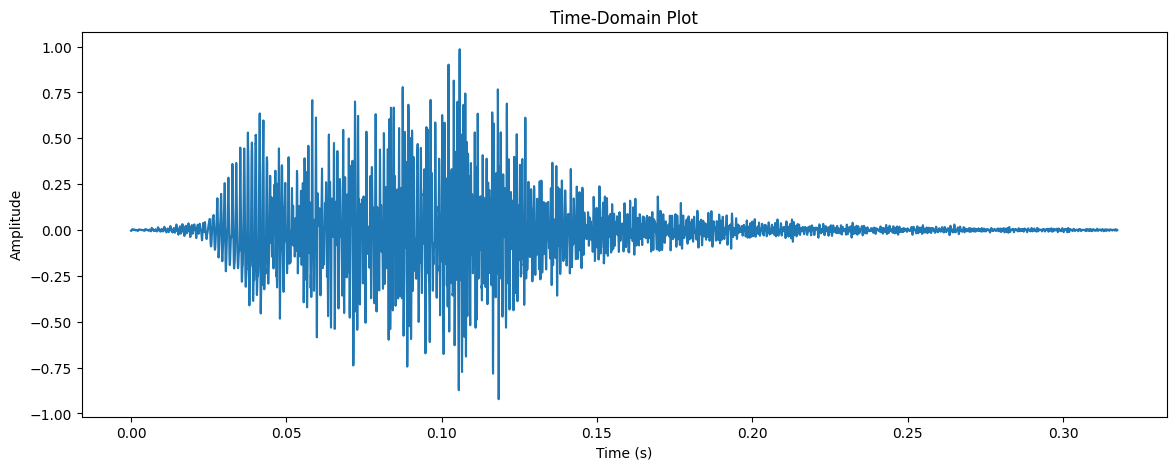

In [16]:
# Time-Domain Plot
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(audio_data))/sample_rate, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Plot')
plt.show()

Time-Domain Graph: Suppose we have a signal x(t) = 2cos(2π*4t) + 3sin(2π*8t).


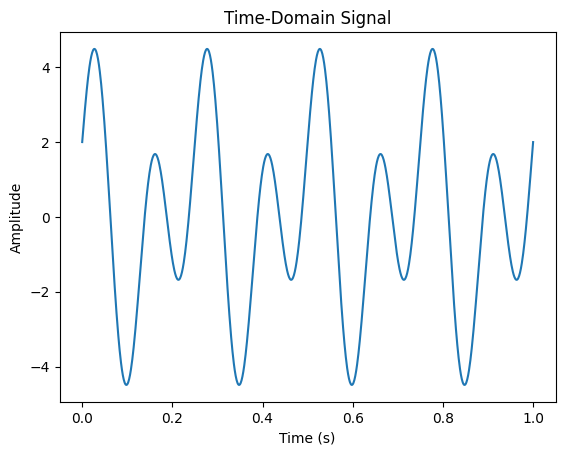

In [33]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 1000)
x = 2*np.cos(2*np.pi*4*t) + 3*np.sin(2*np.pi*8*t)

# x-axis: Time (s)
# y-axis: Amplitude
# Signal oscillates at 4 Hz and 8 Hz

plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal')
plt.show()

FFT Graph:

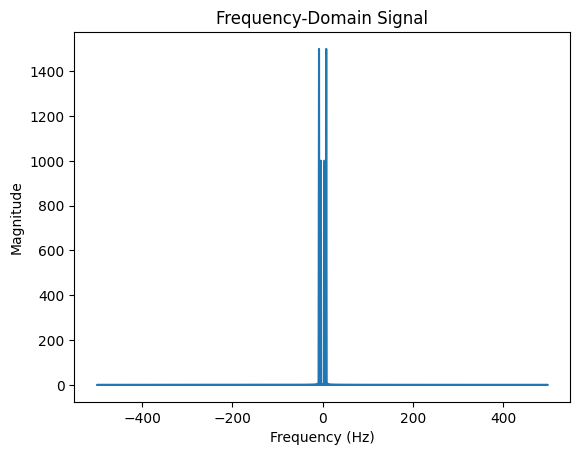

In [34]:
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=0.001)

# x-axis: Frequency (Hz)
# y-axis: Magnitude
# Two peaks at 4 Hz and 8 Hz representing the signal's frequency components
# Magnitude represents amplitude of each frequency component

# FFT transforms time-domain signal to frequency-domain representation.
# Frequency-domain graph shows magnitude of each frequency component.
# Peaks in frequency-domain graph correspond to signal's frequency components.

plt.plot(freq, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain Signal')
plt.show()

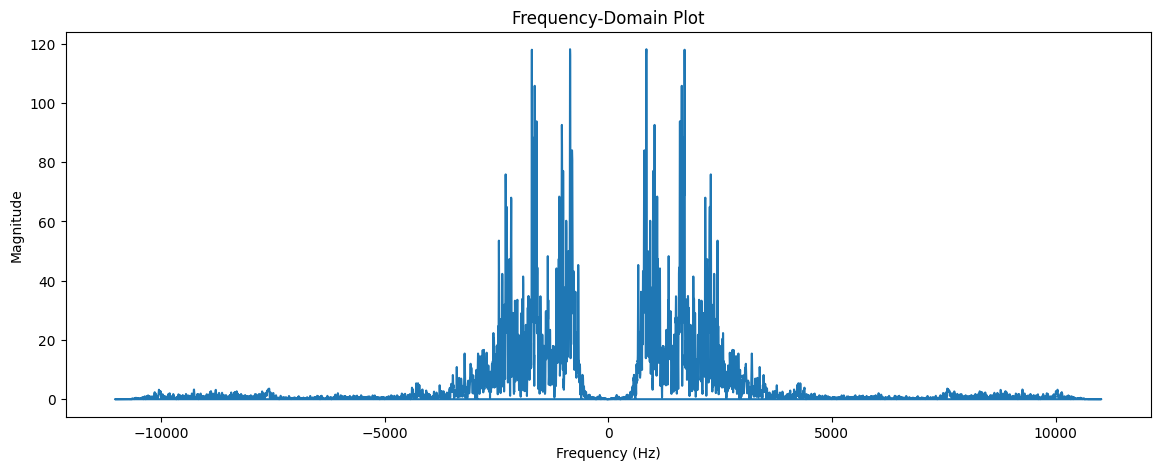

In [17]:
# Frequency-Domain Plot
freq = np.fft.fftfreq(len(audio_data), d=1.0/sample_rate)
magnitude = np.abs(np.fft.fft(audio_data))
plt.figure(figsize=(14, 5))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain Plot')
plt.show()

<Figure size 1400x500 with 0 Axes>

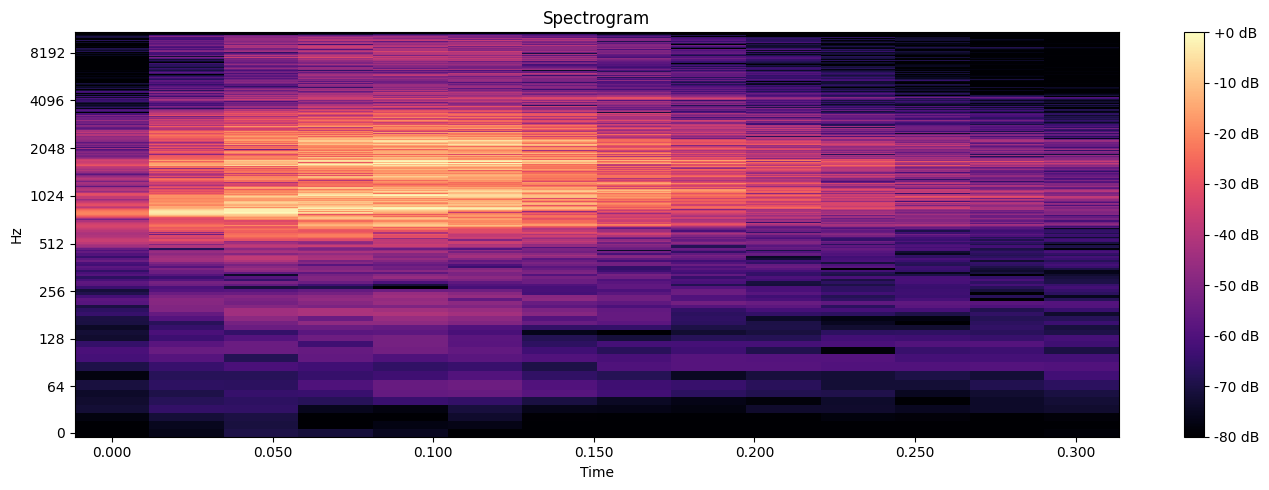

In [15]:
#dog sound
plt.figure(figsize=(14,5))
# Display spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [35]:

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [36]:

wave_sample_rate # no of sampling like frequency

44100

In [37]:

wave_audio # audio_data: Audio time series (NumPy array). y value ie displacement value y=Asin(wt) wrt time [2d chanel] sterio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

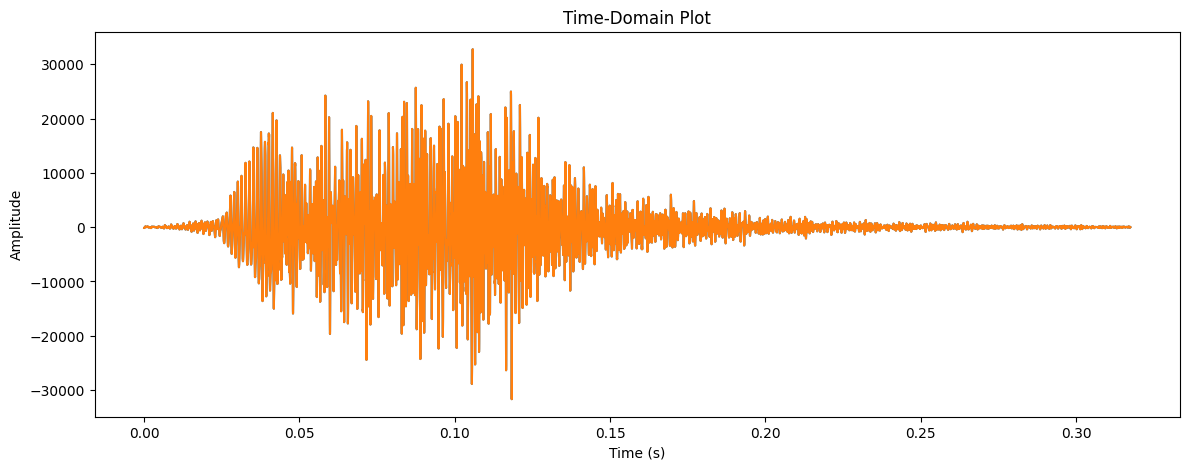

In [38]:
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(wave_audio))/wave_sample_rate, wave_audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Plot')
plt.show()

In [39]:
data #normalize wave audio -1 to 1 1d chanel mono

array([-0.00347107, -0.00501926, -0.00465448, ..., -0.00248442,
       -0.00154777, -0.00035547], dtype=float32)

In [40]:

import pandas as pd
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [41]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [45]:
dog_bark = metadata[metadata['class']=='dog_bark']

In [48]:
dog_bark

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
14,100652-3-0-0.wav,100652,0.000000,4.000000,1,2,3,dog_bark
15,100652-3-0-1.wav,100652,0.500000,4.500000,1,2,3,dog_bark
16,100652-3-0-2.wav,100652,1.000000,5.000000,1,2,3,dog_bark
17,100652-3-0-3.wav,100652,1.500000,5.500000,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
8594,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,3,dog_bark
8595,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,3,dog_bark
8611,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,3,dog_bark
8618,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,3,dog_bark


In [ ]:
# import csv

# # Open CSV file
# with open('data.csv', 'r') as file:
#     reader = csv.reader(file)
    
#     # Traverse data
#     for row in reader:
#         print(row)

In [70]:
# Traverse data
for index, row in dog_bark.iterrows():
    print(index)
    print(row.fold)
# Alternatively, use df.apply() or df.iterrows() for vectorized operations

0
5
14
2
15
2
16
2
17
2
18
10
19
10
20
10
21
10
53
6
54
6
55
6
64
1
65
1
66
1
100
4
101
10
102
10
103
2
104
3
105
1
107
5
108
5
109
5
110
1
111
1
112
1
113
1
193
8
194
8
195
8
417
9
418
9
419
9
420
9
440
6
441
6
442
6
499
8
559
2
560
2
561
2
562
2
583
6
584
6
585
6
586
6
599
4
600
4
601
4
602
8
603
5
604
5
605
5
606
9
612
8
613
8
614
8
615
8
622
7
623
7
624
7
625
7
676
2
677
2
678
2
679
2
760
2
761
2
762
8
763
8
764
1
765
1
766
1
767
1
799
7
800
7
801
7
814
4
815
3
816
2
817
5
818
5
819
5
820
3
821
3
822
3
823
3
829
9
830
9
831
9
832
9
833
4
834
4
835
4
836
4
837
7
838
7
839
7
840
7
841
3
842
3
843
3
844
3
845
3
846
3
847
3
848
3
862
10
863
10
864
6
865
6
866
6
867
6
876
6
877
1
878
1
879
1
880
1
931
7
932
7
933
7
935
3
936
2
937
1
938
4
942
9
943
9
995
4
996
8
997
8
998
8
999
8
1084
3
1085
3
1086
3
1087
6
1088
6
1134
1
1135
1
1136
1
1137
1
1145
3
1146
3
1147
3
1148
3
1149
5
1150
5
1151
5
1152
5
1171
3
1172
3
1173
3
1199
10
1200
10
1201
10
1202
10
1212
10
1213
10
1214
10
1215
10
1225
6

In [68]:
# for key,data in dog_bark.items():
#     print(key)
#     print(data)

In [71]:
for index, row in dog_bark.iterrows():
    filename = f'fold{row.fold}/{row.slice_file_name}'
    audio_data, sample_rate = librosa.load(filename)
    sd.play(audio_data, sample_rate)
    status = sd.wait(300)


KeyboardInterrupt: 

In [72]:

### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64